### 1. Data Exploration and Preprocessing:

In [2]:
import pandas as pd
import numpy as np

#Load the datasets
VariableDescription = pd.read_csv ('dataset/VariableDescription.csv')
train_data = pd.read_csv ('dataset/train_data.csv')
test_data = pd.read_csv ('dataset/test_data.csv')
#SampleSubmission = pd.read_csv ('dataset/SampleSubmission.csv')

#### Exploring the dataset: VariableDescription

In [21]:
VariableDescription

,Variable,Description
0,Customer Id,Identification number for the Policy holder
1,YearOfObservation,year of observation for the insured policy
2,Insured_Period,duration of insurance policy in Olusola Insura...
3,Residential,is the building a residential building or not
4,Building_Painted,"is the building painted or not (N-Painted, V-N..."
5,Building_Fenced,"is the building fence or not (N-Fenced, V-Not ..."
6,Garden,building has garden or not (V-has garden; O-no...
7,Settlement,Area where the building is located. (R- rural ...
8,Building Dimension,Size of the insured building in m2
9,Building_Type,"The type of building (Type 1, 2, 3, 4)"


In [10]:
VariableDescription.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Variable     14 non-null     object
 1   Description  14 non-null     object
dtypes: object(2)
memory usage: 352.0+ bytes


Notes: The dataset is clean with 14 entries and no missing values

#### Exploring dataset: train_data

In [34]:
train_data

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.000000,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.000000,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.000000,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.000000,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.000000,0,V,N,O,R,680.0,1,1800.0,3,1053,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7155,H5290,2012,1.000000,1,V,V,V,U,2732.0,1,2001.0,.,2B353,0
7156,H5926,2013,1.000000,0,V,V,V,U,2732.0,2,1980.0,.,2B353,1
7157,H6204,2016,0.038251,0,V,V,V,U,2732.0,1,1992.0,.,2B353,0
7158,H6537,2013,1.000000,0,V,V,V,U,2732.0,1,1972.0,.,2B353,0


In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [23]:
# Check for dupulicates
train_data.duplicated().any()

False

In [24]:
# Check for missing values
train_data.isnull().any()

Customer Id           False
YearOfObservation     False
Insured_Period        False
Residential           False
Building_Painted      False
Building_Fenced       False
Garden                 True
Settlement            False
Building Dimension     True
Building_Type         False
Date_of_Occupancy      True
NumberOfWindows       False
Geo_Code               True
Claim                 False
dtype: bool

In [28]:
# fill missing values
train_data.fillna(method ='pad', inplace=True)
train_data.isnull().any()

Customer Id           False
YearOfObservation     False
Insured_Period        False
Residential           False
Building_Painted      False
Building_Fenced       False
Garden                False
Settlement            False
Building Dimension    False
Building_Type         False
Date_of_Occupancy     False
NumberOfWindows       False
Geo_Code              False
Claim                 False
dtype: bool

#### Exploring dataset: test_data

In [35]:
test_data

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3064,H11583,2015,1.000000,0,V,V,V,U,1050.0,4,1900.0,.,2B353
3065,H11720,2012,1.000000,0,V,V,V,U,1050.0,2,1948.0,.,2B353
3066,H11721,2012,1.000000,0,V,V,V,U,1050.0,2,1993.0,.,2B353
3067,H12408,2013,1.000000,0,V,V,V,U,1050.0,1,1800.0,.,2B353


In [30]:
# Check for dupulicates
test_data.duplicated().any()

False

In [32]:
# Check for missing values
test_data.isnull().any()

Customer Id           False
YearOfObservation     False
Insured_Period        False
Residential           False
Building_Painted      False
Building_Fenced       False
Garden                 True
Settlement            False
Building Dimension     True
Building_Type         False
Date_of_Occupancy      True
NumberOfWindows       False
Geo_Code               True
dtype: bool

In [33]:
# fill missing values
test_data.fillna(method ='pad', inplace=True)
test_data.isnull().any()

Customer Id           False
YearOfObservation     False
Insured_Period        False
Residential           False
Building_Painted      False
Building_Fenced       False
Garden                False
Settlement            False
Building Dimension    False
Building_Type         False
Date_of_Occupancy     False
NumberOfWindows       False
Geo_Code              False
dtype: bool

### 2. Feature Selection:

/tmp/ipykernel_333655/3501651030.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":5})


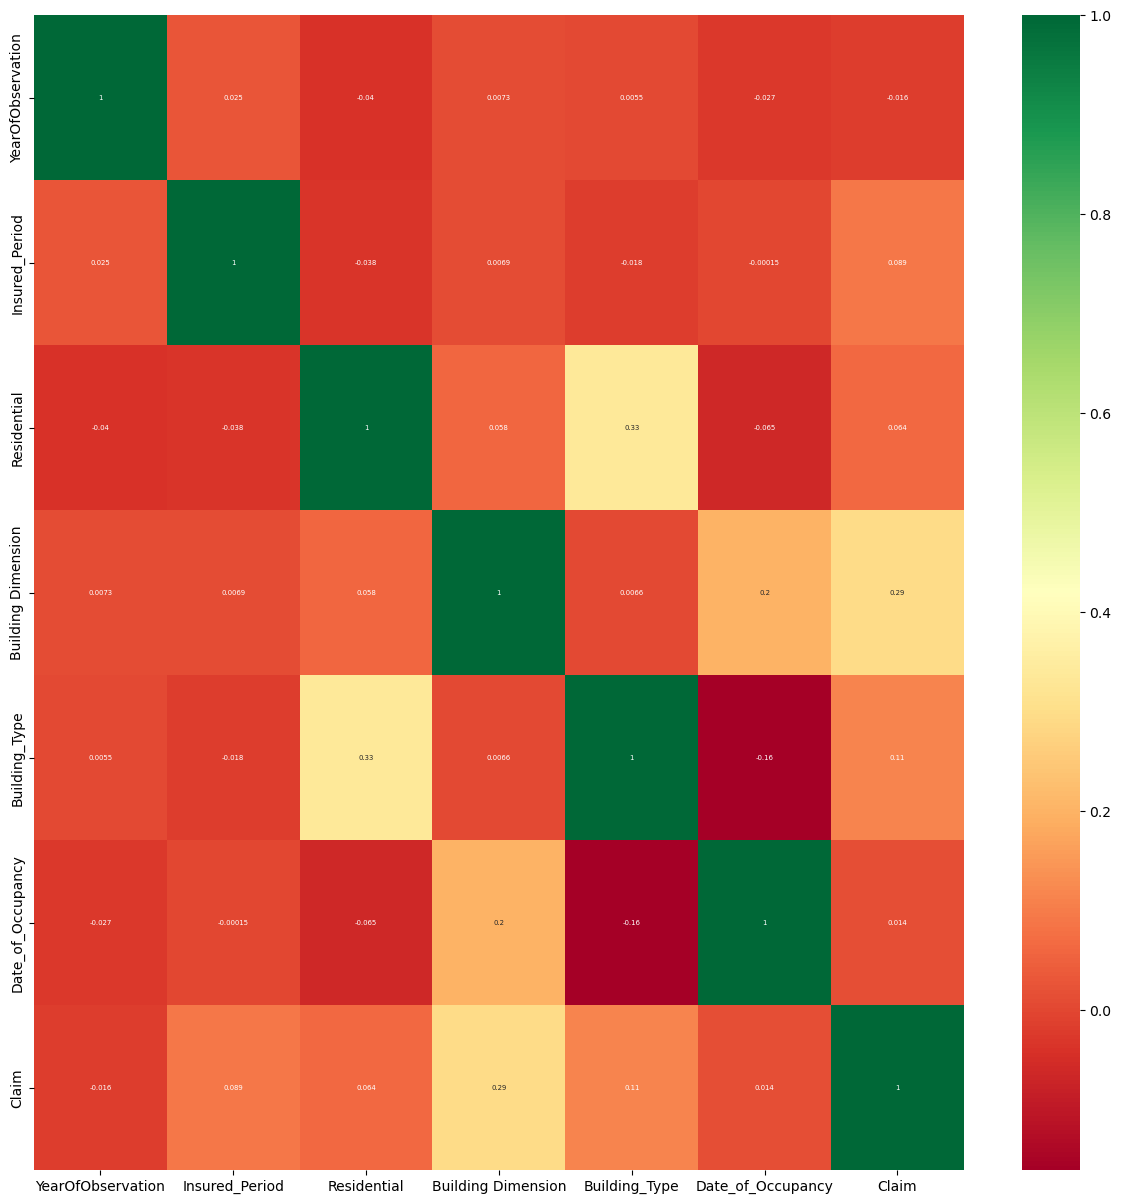

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# heatmap to identify which features are most related to the target variable
plt.figure(figsize=(15, 15))
sns.heatmap(train_data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":5})
plt.show()